<a href="https://colab.research.google.com/github/borisenko-ru/miscellaneous/blob/main/un_ga_speech_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

77th general debate of the United Nations General Assembly. Speech statistics by country.

Data was taken from https://gadebate.un.org

In [1]:
!pip install PyPDF2

import PyPDF2
import re
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [3]:
def word_clouds(country_notes, exclude_words):
  pdffileobj = open(country_notes+'.pdf','rb')
  pdfreader = PyPDF2.PdfFileReader(pdffileobj)
 
  x = pdfreader.numPages

  for i in range(x):
    pageobj = pdfreader.getPage(i)
    text = pageobj.extractText()
    file1 = open(country_notes+'.txt','a')
    file1.writelines(text)

  document_text = open(country_notes+'.txt', 'r')
  text_string = document_text.read().lower()
  match_pattern = re.findall(r'\b[a-zA-Zа-яА-Я]{3,15}\b', text_string)

  return ' '.join(match_pattern)

def word_freq(country_notes, exclude_words, percent_speech_threshold):

  # WordCloud plot
  text = word_clouds(country_notes, None)

  wordcloud = WordCloud(width=500, height=500, stopwords=exclude_words_en+exclude_words_ru).generate(text)

  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.margins(x=0, y=0)
  plt.show()

  # Table
  pdffileobj = open(country_notes+'.pdf','rb')
  pdfreader = PyPDF2.PdfFileReader(pdffileobj)
 
  x = pdfreader.numPages

  for i in range(x):
    pageobj = pdfreader.getPage(i)
    text = pageobj.extractText()
    file1 = open(country_notes+'.txt','a')
    file1.writelines(text)

  frequency = {}
  document_text = open(country_notes+'.txt', 'r')
  text_string = document_text.read().lower()

  match_pattern = re.findall(r'\b[a-zA-Zа-яА-Я]{3,15}\b', text_string)
 
  for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
  frequency_list = frequency.keys()

  data = dict()
  for words in frequency_list:
    data[words] = frequency[words]

  freq = pd.DataFrame.from_dict(data, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
  freq['%_speech'] = freq['frequency'] / freq['frequency'].sum() * 100
  freq.reset_index(inplace=True)
  freq = freq[(~freq['index'].isin(exclude_words)) & (freq['%_speech'] >= percent_speech_threshold)]

  return freq


In [4]:
exclude_words_en = ['can', 'their', 'every', 'more', 'the', 'and', 'that', \
                    'for', 'with', 'this', 'are', 'will', 'not', 'have', 'who', \
                    'but', 'only', 'what', 'which', 'should', 'from', 'there', \
                    'our', 'all', 'you', 'has', 'its', 'after', 'they', 'was', \
                    'based', 'also', 'through', 'her', 'those', 'between']
exclude_words_ru = ['они', 'что', 'как', 'для', 'том', 'именно', 'которые', \
                    'также', 'уже','чтобы', 'этот', 'этом', 'этой', 'это','его', \
                    'так', 'когда', 'всего', 'все', 'ваши', 'нам', 'более', \
                    'того']
percent_speech_threshold = 0.35


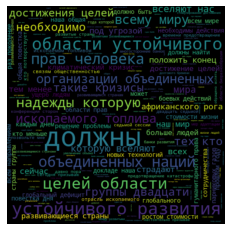

,index,frequency,%_speech
1,должны,80,0.738757
2,области,68,0.627943
6,развития,48,0.443254
11,страны,44,0.406316
13,прав,43,0.397082
14,мира,43,0.397082
16,устойчивого,40,0.369379
17,больше,40,0.369379


In [5]:
# Secretary-General of the United Nations H.E. Mr. António Guterres , Secretary-General
word_freq('unsg_ru', exclude_words=exclude_words_ru, percent_speech_threshold=percent_speech_threshold)


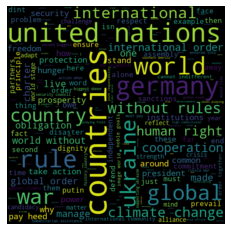

,index,frequency,%_speech
10,world,68,0.961403
11,order,57,0.805882
12,rules,52,0.735190
13,global,51,0.721052
15,international,47,0.664499
16,nations,46,0.650361
19,countries,43,0.607946
20,united,42,0.593807
22,war,40,0.565531
23,germany,39,0.551393


In [6]:
#Germany H.E. Mr. Olaf Scholz, Chancellor
word_freq('un_ga_de', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


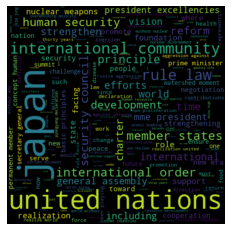

,index,frequency,%_speech
2,japan,113,1.594019
3,international,104,1.467062
6,security,70,0.987445
8,nations,67,0.945126
11,united,59,0.832275
13,rule,55,0.775850
14,law,55,0.775850
15,community,55,0.775850
17,states,43,0.606574
19,human,43,0.606574


In [7]:
# Japan H.E. Mr. Kishida Fumio, Prime Minister
word_freq('un_ga_jp', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


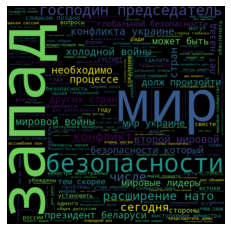

,index,frequency,%_speech
4,запад,44,0.723803
5,безопасности,43,0.707353
6,мир,40,0.658003
8,украине,36,0.592203
9,сегодня,35,0.575753
11,нато,28,0.460602
14,войны,24,0.394802
15,нет,24,0.394802
17,беларуси,24,0.394802
19,беларусь,23,0.378352


In [8]:
# Belarus H.E. Mr. Vladimir Makei, Minister for Foreign Affairs
word_freq('un_ga_by', exclude_words=exclude_words_ru, percent_speech_threshold=percent_speech_threshold)


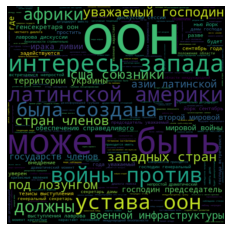

,index,frequency,%_speech
0,оон,85,1.144781
3,сша,43,0.579125
4,нато,39,0.525253
5,стран,36,0.484848
6,против,32,0.430976
7,украины,32,0.430976
9,безопасности,28,0.377104
11,войны,27,0.363636
12,быть,27,0.363636


In [9]:
# Russian Federation H.E. Mr. Sergey Lavrov, Minister for Foreign Affairs
word_freq('un_ga_ru', exclude_words=exclude_words_ru, percent_speech_threshold=percent_speech_threshold)


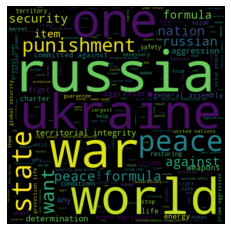

,index,frequency,%_speech
5,peace,125,1.347709
8,russia,93,1.002695
10,formula,81,0.873315
13,security,76,0.819407
15,war,73,0.787062
17,world,69,0.743935
19,russian,66,0.711590
21,ukraine,64,0.690027
23,against,62,0.668464
24,one,62,0.668464


In [10]:
# Ukraine H.E. Mr. Volodymyr Zelenskyy, President
word_freq('un_ga_ua', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


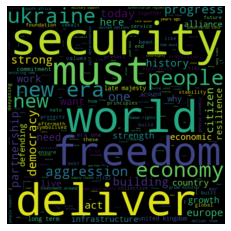

,index,frequency,%_speech
6,new,70,1.240035
10,deliver,43,0.761736
11,must,42,0.744021
12,security,40,0.708592
13,world,39,0.690877
15,one,38,0.673162
16,people,38,0.673162
17,era,34,0.602303
18,economy,28,0.496014
21,ukraine,28,0.496014


In [11]:
# United Kingdom of Great Britain and Northern Ireland H.E. Ms. Elizabeth Truss, Prime Minister
word_freq('un_ga_uk', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


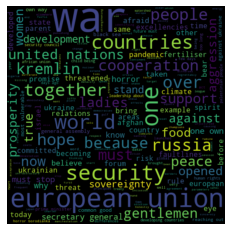

,index,frequency,%_speech
7,war,81,1.041131
9,union,70,0.899743
10,european,66,0.848329
13,one,52,0.668380
15,security,47,0.604113
17,countries,40,0.514139
18,must,40,0.514139
21,world,37,0.475578
22,hope,36,0.462725
25,ukraine,32,0.411311


In [12]:
# European Union H.E. Mr. Charles Michel, President of the European Council
word_freq('un_ga_eu', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


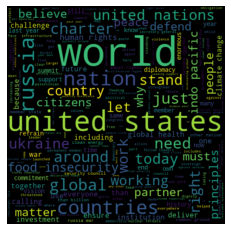

,index,frequency,%_speech
4,united,160,1.342282
5,world,152,1.275168
7,states,132,1.107383
10,nations,76,0.637584
11,russia,76,0.637584
19,global,60,0.503356
21,countries,60,0.503356
22,rights,52,0.436242
23,food,52,0.436242
24,war,52,0.436242


In [13]:
# United States of America H.E. Mr. Joseph R. Biden, Jr., President
word_freq('un_ga_us', exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)
